In [1]:
import cv2
import numpy as np # this module is useful to work with numerical arrays
import torch
import torchvision
from torchvision import transforms
from torch import nn
import matplotlib.pyplot as plt
import time

VIDEOS_LOCATION = "C:\\Users\\trett\Documents\GitHub\ThirdYearProject\pytorch\\videos\\"

transform = transforms.ToTensor()

width = 640
height = 360

entries = []
# cap = cv2.VideoCapture("C:\\Users\\trett\Documents\GitHub\ThirdYearProject\pytorch\input_video_color.mp4")
# fps = cap.get(cv2.CAP_PROP_FPS)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# if not cap.isOpened():
#     print("Error: could not open video file")
# ret, first_frame = cap.read()
# if not ret:
#     print("Error: could not read first frame")
#     exit()
# while cap.isOpened():
#     ret, middle_frame = cap.read()
#     if not ret:
#         break
#     ret, last_frame = cap.read()
#     if not ret:
#         break
#     # Process the batch of 3 frames here
#     # batch_of_frames = [transform(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)),
#     #                    transform(cv2.cvtColor(middle_frame, cv2.COLOR_BGR2RGB)),
#     #                    transform(cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB))]
#     batch_of_frames = [transform(first_frame), transform(middle_frame), transform(last_frame)]
#     entries.append(batch_of_frames)
#     cv2.imshow('batch_of_frames', first_frame)
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break
#     # Update the previous frames
#     first_frame = last_frame
# cap.release()
# cv2.destroyAllWindows()

# class MyVideoDataset(Dataset):
#
#     entries = []
#     len_entries = 0
#
#     def __int__(self):
#         transform = transforms.Compose([
#             transforms.ToPILImage(),
#             transforms.ToTensor()
#         ])
#         cap = cv2.VideoCapture('C:\\Users\\trett\Documents\GitHub\ThirdYearProject\pytorch\input_video_color.mp4')
#         if not cap.isOpened():
#             print("Error: could not open video file")
#         ret, first_frame = cap.read()
#         if not ret:
#             print("Error: could not read first frame")
#             exit()
#         while cap.isOpened():
#             ret, middle_frame = cap.read()
#             if not ret:
#                 break
#             ret, last_frame = cap.read()
#             if not ret:
#                 break
#             f1 = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)
#             f2 = cv2.cvtColor(middle_frame, cv2.COLOR_BGR2RGB)
#             f3 = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
#
#             batch_of_frames = [f1, f2, f3]
#             self.entries.append(transform(f1))
#             self.len_entries = self.len_entries + 1
#
#             # Update the previous frames
#             first_frame = last_frame
#         cap.release()
#
#     def __len__(self):
#         return self.len_entries
#
#     def __getitem__(self, idx):
#         return self.entries[idx]

# batch_size = 10
# train_dataset = MyVideoDataset()
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
#
# for batch in train_loader:
#     print(len(batch))
#     break



In [9]:
VIDEOS_LOCATION = "C:\\Users\\trett\Documents\GitHub\ThirdYearProject\pytorch\\videos\\"
VIDEOS_TRAIN = [
    {
        "file": "soldiers.mp4",
        "fps": None
    },
    {
        "file": 'running.mp4',
        "fps": None
    }
]

VIDEOS_TEST = [
    {
        "file": 'nato.mp4',
        "fps": None
    }
]

VIDEOS_SKI_TRAIN = [
    {
        "file": 'drone_shot.mp4',
        "fps": None
    },
    {
        "file": "crevace2.mp4",
        "fps": None
    }
]

VIDEOS_SKI_TEST = [
    {
        "file": "powder_maybe2.mp4",
        "fps": None
    }
]

class VideoDataLoader:
    video_index = 0
    videos = None
    cap = None
    frame_batch_buffer = []
    first_frame = None
    def __init__(self, videos):
        self.videos = videos
        self.cap = cv2.VideoCapture(VIDEOS_LOCATION + self.videos[self.video_index]["file"])
        self.videos[self.video_index]["fps"] = self.cap.get(cv2.CAP_PROP_FPS)
        if not self.cap.isOpened():
            print("Error: could not open video file")
        ret, first_frame = self.cap.read()
        for i in range(10):
            ret, middle_frame = self.cap.read()
            if not ret:
                break
            ret, last_frame = self.cap.read()
            if not ret:
                break
            batch_of_frames = [transform(first_frame), transform(middle_frame), transform(last_frame)]
            self.frame_batch_buffer.append(batch_of_frames)
            first_frame = last_frame
        self.first_frame = first_frame

    def hasNext(self):
        return len(self.frame_batch_buffer) != 0

    def nextFile(self):
        self.video_index += 1
        self.cap.release()
        try:
            self.cap = cv2.VideoCapture(VIDEOS_LOCATION + self.videos[self.video_index]["file"])
        except:
            batch = self.frame_batch_buffer.pop(0)
            self.frame_batch_buffer = []
            return batch

        self.videos[self.video_index]["fps"] = self.cap.get(cv2.CAP_PROP_FPS)
        if not self.cap.isOpened():
            print("Error: could not open video file")
        ret, first_frame = self.cap.read()
        for i in range(10):
            ret, middle_frame = self.cap.read()
            if not ret:
                break
            ret, last_frame = self.cap.read()
            if not ret:
                break
            batch_of_frames = [transform(first_frame), transform(middle_frame), transform(last_frame)]
            self.frame_batch_buffer.append(batch_of_frames)
            first_frame = last_frame
        self.first_frame = first_frame
        return self.frame_batch_buffer.pop(0)

    def getNext(self):
        if len(self.frame_batch_buffer) < 5:
            return self.nextFile()
        ret, middle_frame = self.cap.read()
        if not ret:
            return self.nextFile()
        ret, last_frame = self.cap.read()
        if not ret:
            return self.nextFile()

        batch_of_frames = [transform(self.first_frame), transform(middle_frame), transform(last_frame)]
        # batch_of_frames = [self.first_frame, middle_frame, last_frame]
        self.frame_batch_buffer.append(batch_of_frames)
        self.first_frame = last_frame
        # cv2.imshow('batch_of_frames', middle_frame)
        # cv2.imshow('batch_of_frames', last_frame)
        # if cv2.waitKey(25) & 0xFF == ord('q'):
        #     cv2.destroyAllWindows()
        #     self.frame_batch_buffer = []
        return self.frame_batch_buffer.pop(0)


In [3]:
class Autoencoder(nn.Module):

    def __init__(self):
        super().__init__()

        self.lefthand_encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True)
        )

        self.righthand_encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=64, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=16, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True)
        )


    def forward(self, left, right):
        left = self.lefthand_encoder(left)
        right = self.lefthand_encoder(right)
        encoded = torch.cat((left, right), 0)
        x = self.decoder(encoded)
        return x


In [4]:
### Define the loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.0001

### Set the random seed for reproducible results
# torch.manual_seed(0)

### Initialize the two networks
d = 32

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
autoencoder = Autoencoder()
params_to_optimize = [
    {'params': autoencoder.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-08)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
autoencoder = autoencoder.to(device)


Selected device: cuda


In [5]:

autoencoder.train()

epochs = 10
train_loss_epochs = []
for i in range(epochs):
    train_loss = []
    start = time.time()
    videoDataLoader = VideoDataLoader(VIDEOS_TRAIN)
    while videoDataLoader.hasNext():
        batch = videoDataLoader.getNext()
        first_frame = batch[0].to(device)
        middle_frame = batch[1].to(device)
        last_frame = batch[2].to(device)

        # Encode data
        res_frame = autoencoder(first_frame, last_frame)
        # image_np = torchvision.transforms.functional.invert(res_frame.cpu().data).numpy()

        # Display the image using matplotlib

        # Evaluate loss
        loss = loss_fn(res_frame, middle_frame)
        # Backward pass
        optim.zero_grad()
        loss.backward()
        optim.step()
        # Print batch loss
        print('\t %d partial train loss (single batch): %f' % (i, loss.data))
        train_loss.append(loss.detach().cpu().numpy())
    train_loss_epochs.append(train_loss)

	 0 partial train loss (single batch): 0.242461
	 0 partial train loss (single batch): 0.241926
	 0 partial train loss (single batch): 0.241766
	 0 partial train loss (single batch): 0.241434
	 0 partial train loss (single batch): 0.241241
	 0 partial train loss (single batch): 0.240874
	 0 partial train loss (single batch): 0.240543
	 0 partial train loss (single batch): 0.239997
	 0 partial train loss (single batch): 0.239469
	 0 partial train loss (single batch): 0.238907
	 0 partial train loss (single batch): 0.238655
	 0 partial train loss (single batch): 0.238114
	 0 partial train loss (single batch): 0.237979
	 0 partial train loss (single batch): 0.237590
	 0 partial train loss (single batch): 0.237374
	 0 partial train loss (single batch): 0.236877
	 0 partial train loss (single batch): 0.237015
	 0 partial train loss (single batch): 0.236939
	 0 partial train loss (single batch): 0.236705
	 0 partial train loss (single batch): 0.236168
	 0 partial train loss (single batch): 0

In [16]:
videoDataLoader = VideoDataLoader(VIDEOS_TEST)
fps = VIDEOS_TEST[0]["fps"]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('24fpsFromModel.mp4', fourcc, fps, (width, height), isColor=True)
autoencoder.eval()
i = 0
with torch.no_grad():
    test_loss = []
    while videoDataLoader.hasNext():
        batch = videoDataLoader.getNext()
        first_f = np.transpose(batch[0].numpy(), (1, 2, 0))
        original_f = np.transpose(batch[1].numpy(), (1, 2, 0))

        first_frame = batch[0].to(device)
        middle_frame = batch[1].to(device)
        last_frame = batch[2].to(device)

        res_frame = autoencoder(first_frame, last_frame)
        # image_np = torchvision.transforms.functional.invert(res_frame.cpu().data).numpy()
        middle_f = np.transpose(res_frame.cpu().data.numpy(), (1, 2, 0))
        cv2.imshow('generated frame', cv2.hconcat([first_f, first_f]))
        cv2.imshow('generated frame', cv2.hconcat([first_f, middle_f]))
        # out.write(cv2.hconcat([first_f, first_f]))
        # out.write(cv2.hconcat([first_f, middle_f]))
        # out.write(first_f)
        # out.write(middle_f)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

        # Evaluate loss
        loss = loss_fn(res_frame, middle_frame)
        # # Backward pass
        # optim.zero_grad()
        # loss.backward()
        # optim.step()
        # Print batch loss
        print('\t %d partial test loss (single batch): %f' % (i, loss.data))
        i = i + 1
        test_loss.append(loss.detach().cpu().numpy())
    cv2.destroyAllWindows()
# out.release()

	 0 partial test loss (single batch): 0.001255
	 1 partial test loss (single batch): 0.001160
	 2 partial test loss (single batch): 0.001184
	 3 partial test loss (single batch): 0.001248
	 4 partial test loss (single batch): 0.001196
	 5 partial test loss (single batch): 0.001150
	 6 partial test loss (single batch): 0.001231
	 7 partial test loss (single batch): 0.001227
	 8 partial test loss (single batch): 0.001255
	 9 partial test loss (single batch): 0.001319
	 10 partial test loss (single batch): 0.001258
	 11 partial test loss (single batch): 0.001297
	 12 partial test loss (single batch): 0.001367
	 13 partial test loss (single batch): 0.001245
	 14 partial test loss (single batch): 0.001231
	 15 partial test loss (single batch): 0.001260
	 16 partial test loss (single batch): 0.001262
	 17 partial test loss (single batch): 0.001228
	 18 partial test loss (single batch): 0.001261
	 19 partial test loss (single batch): 0.001203
	 20 partial test loss (single batch): 0.001259
	 

In [4]:
autoencoder.train()

epochs = 10

for i in range(epochs):
    train_loss = []
    start = time.time()
# Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for batch in entries:  # with "_" we just ignore the labels (the second element of the dataloader tuple)
        # Move tensor to the proper device
        first_frame = batch[0].to(device)
        middle_frame = batch[1].to(device)
        last_frame = batch[2].to(device)

        # Encode data
        res_frame = autoencoder(first_frame, last_frame)
        # image_np = torchvision.transforms.functional.invert(res_frame.cpu().data).numpy()

        # Display the image using matplotlib

        # Evaluate loss
        loss = loss_fn(res_frame, middle_frame)
        # Backward pass
        optim.zero_grad()
        loss.backward()
        optim.step()
        # Print batch loss
        # print('\t %d partial train loss (single batch): %f' % (i, loss.data))
        train_loss.append(loss.detach().cpu().numpy())

    print(np.mean(train_loss))
    end = time.time()
    print(end - start)

0.015145157
36.17489814758301
0.011020651
16.7913875579834
0.008440906
12.272334575653076
0.00837696
12.375999450683594
0.008342368
13.156888961791992
0.008319264
12.81603717803955
0.008300988
12.412153482437134
0.008286398
12.515608072280884
0.008273742
12.78878378868103
0.008262171
12.447587490081787


In [2]:
# out = cv2.VideoWriter('out_sidebyside.mp4', fourcc, fps, (width*2, height), isColor=True)
for batch in entries:  # with "_" we just ignore the labels (the second element of the dataloader tuple)
    # Move tensor to the proper device
    first_f = np.transpose(batch[0].numpy(), (1, 2, 0))
    original_f = np.transpose(batch[1].numpy(), (1, 2, 0))

    first_frame = batch[0].to(device)
    middle_frame = batch[1].to(device)
    last_frame = batch[2].to(device)

    # Encode data
    res_frame = autoencoder(first_frame, last_frame)
    # image_np = torchvision.transforms.functional.invert(res_frame.cpu().data).numpy()
    # out.write(first_frame)
    # plt.imshow(np.transpose(image_np, (1, 2, 0)))
    # plt.show()
    middle_f = np.transpose(res_frame.cpu().data.numpy(), (1, 2, 0))
    # out.write(cv2.hconcat([first_f, first_f]))
    # out.write(cv2.hconcat([original_f, middle_f]))
    cv2.imshow('generated frame', cv2.hconcat([original_f, middle_f]))
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

    # Evaluate loss
    loss = loss_fn(res_frame, middle_frame)
    # Backward pass
    optim.zero_grad()
    loss.backward()
    optim.step()
    # Print batch loss
    print('\t %d partial train loss (single batch): %f' % (i, loss.data))
    i = i + 1

# out.release()

NameError: name 'entries' is not defined

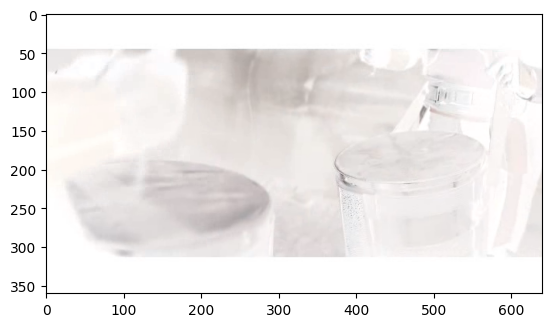

In [15]:
for batch in entries:
    first_frame = entries[100][0]
    middle_frame = entries[100][1]
    last_frame = entries[100][2]
    image_np = torchvision.transforms.functional.invert(middle_frame).numpy()

# Display the image using matplotlib
    plt.imshow(np.transpose(image_np, (1, 2, 0)))
    # plt.imshow(image_np)
    plt.show()
    break